In [1]:
%%time
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
scalingFactor = 200
rxndiff=dict()

print('Starting scaling = ', scalingFactor)
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


#Growth rate = 3.0
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

gr_sim = dict()

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))

data = "191105_0908/"

for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))


gr_dict = {'gr_1':gr_sim}

def computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict):
    import numpy as np

    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

Starting scaling =  200
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 1min 1s, sys: 686 ms, total: 1min 1s
Wall time: 1min 2s


In [2]:
%load_ext autoreload
elong_t_tRNA_list = list()
p_tRNA_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,gr25_pCodon,extra2=True)

tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()

for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
ranked_list = tRNA_weightedbycodon.argsort()
#print(ranked_list)
#print(1+np.where(ranked_list == (0))[0][0])
tRNA_weightedbycodon_adjusted = [val*(1+np.where(ranked_list == (i))[0][0])**2 for i, val in enumerate(tRNA_weightedbycodon)]
tRNA_weightedbycodon_adjusted = tRNA_weightedbycodon_adjusted/sum(tRNA_weightedbycodon_adjusted)
print(tRNA_weightedbycodon)
print(tRNA_weightedbycodon_adjusted)

elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict)
print('WT: ',elong_t)

elong_t1, std = computedElongationLatency_gr3_v2(tRNA_weightedbycodon,gr25_pCodon,gr_dict)
print('WT: ',elong_t1)

elong_t_adjusted, std = computedElongationLatency_gr3_v2(tRNA_weightedbycodon_adjusted,gr25_pCodon,gr_dict)
print('WT: ',elong_t_adjusted)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[7.22611103e-02 9.64624972e-03 5.31564718e-02 5.06407691e-04
 5.14575557e-04 2.45035979e-05 2.84405093e-02 4.32978576e-02
 5.36628795e-03 5.72567405e-03 2.22819384e-02 6.11201411e-02
 2.95676749e-03 6.51142276e-02 1.71443507e-02 4.87213206e-02
 4.96197858e-02 6.49345346e-03 5.02895508e-02 3.48767877e-03
 5.71750619e-03 5.89964960e-02 1.76997656e-02 2.54592383e-02
 2.35397898e-02 4.46782269e-03 3.13482696e-02 1.55189454e-04
 1.70054970e-02 2.05013436e-03 9.39304588e-03 2.28781926e-02
 3.86666776e-02 3.40600011e-03 3.86666776e-02 2.23962885e-02
 5.74200979e-03 1.89821205e-02 6.57268176e-02 4.15335985e-02]
[1.18300941e-01 2.52674871e-03 6.66278537e-02 4.66343996e-06
 8.42427863e-06 2.50722578e-08 1.96719609e-02 4.25748751e-02
 5.49082446e-04 8.43631331e-04 1.00543765e-02 8.56153002e-02
 1.08913888e-04 9.62070003e-02 5.68368027e-03 5.10484541e-02
 5.52899698e-02 1.30225307e-03 5.94838648e-02 2.28391554e

R^2 0.5263314745468692
1.269359404607539


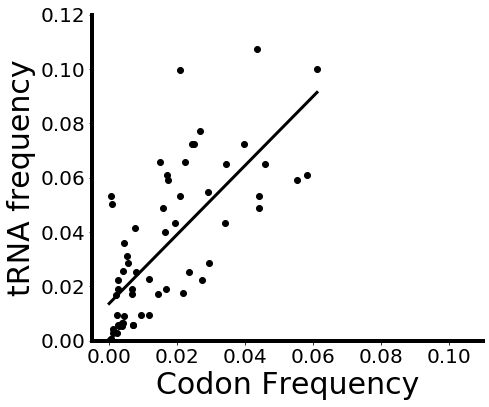

In [3]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


elong_t_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_1500sample_elong_t_list2.npy')
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(tRNA_weightedbycodon,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

R^2 0.5027562492143487
1.80495226464664


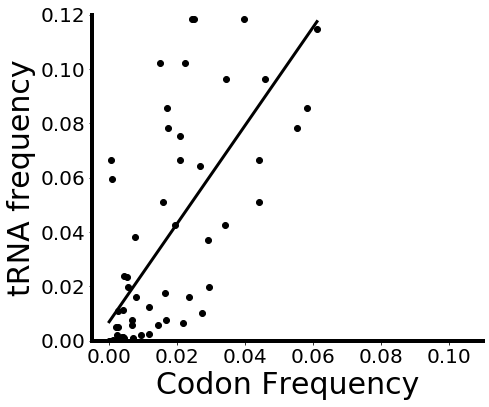

In [43]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(tRNA_weightedbycodon_adjusted,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

[7.22611103e-02 9.64624972e-03 5.31564718e-02 5.06407691e-04
 5.14575557e-04 2.45035979e-05 2.84405093e-02 4.32978576e-02
 5.36628795e-03 5.72567405e-03 2.22819384e-02 6.11201411e-02
 2.95676749e-03 6.51142276e-02 1.71443507e-02 4.87213206e-02
 4.96197858e-02 6.49345346e-03 5.02895508e-02 3.48767877e-03
 5.71750619e-03 5.89964960e-02 1.76997656e-02 2.54592383e-02
 2.35397898e-02 4.46782269e-03 3.13482696e-02 1.55189454e-04
 1.70054970e-02 2.05013436e-03 9.39304588e-03 2.28781926e-02
 3.86666776e-02 3.40600011e-03 3.86666776e-02 2.23962885e-02
 5.74200979e-03 1.89821205e-02 6.57268176e-02 4.15335985e-02]


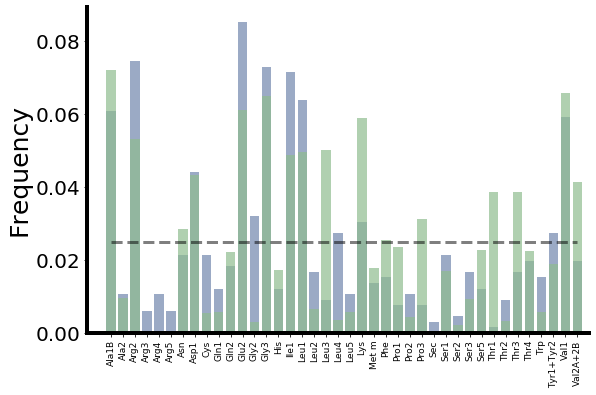

In [17]:
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']

fig,ax = plt.subplots(figsize=(9,6))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),tRNA_weightedbycodon,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)

print(tRNA_weightedbycodon)


for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

Uniform:  [212.97156465399053]
[ 4.62535679e-03  1.04105609e-03 -5.04163251e-03 -6.24780363e-04
  2.82606619e-02 -2.82606619e-02  9.36140582e-03 -9.36140582e-03
  9.85901629e-03  7.93271530e-03 -1.51045524e-02 -2.68717923e-03
  1.54679156e-02 -3.88377555e-03 -3.31268957e-04 -1.12528711e-02
  2.91232186e-04  6.87697804e-05  5.50123866e-03 -9.00361004e-03
  1.49791420e-02 -1.49791420e-02  5.45203093e-03 -5.45203093e-03
  3.46944695e-18  4.75514117e-02 -9.67058494e-03 -3.78808268e-02
  9.88230788e-03  5.68257429e-03  9.67118026e-03 -2.52360624e-02
  8.67361738e-19  2.71050543e-20  9.92313190e-04 -9.92313190e-04
  2.16717633e-03 -2.16717633e-03  3.41019094e-02  7.02892430e-04
  1.01940719e-02 -1.01940719e-02 -4.64511455e-04 -7.39110014e-04
  1.61867766e-02 -1.14807837e-02 -9.13064510e-05  2.35778359e-02
 -2.46351651e-02  7.88633667e-04 -7.24433865e-03  7.24433865e-03
 -9.80383322e-06  9.80383322e-06 -4.36763135e-02  2.00906169e-03
 -2.22881611e-03  9.09126614e-03 -2.52000882e-02 -2.1154808

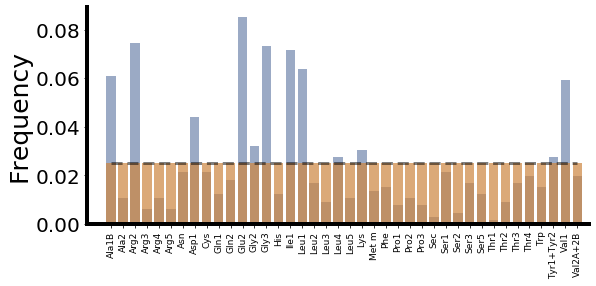

<Figure size 432x288 with 0 Axes>

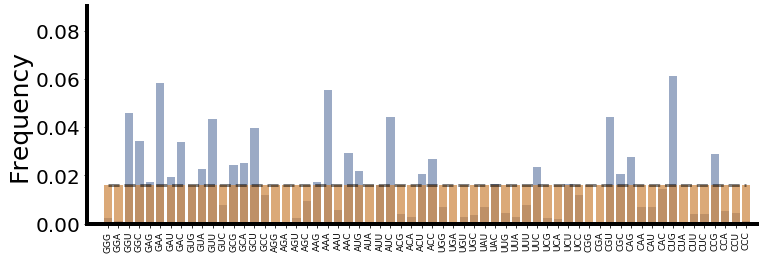

In [48]:
# Uniform distribution plot tRNA
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_uniform,pCodon_uniform,extra2=True)


elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict)
print('Uniform: ',elong_t)

tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']

fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_uniform,color='peru',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

    
#Uniform distribution plot codons
plt.figure()
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(62),pCodon_uniform,color='peru',width=0.8,alpha=0.7)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
codon_dist = (p_Codon_list[np.argmin(elong_t_Codon_list)] - gr25_pCodon)
print(codon_dist)
print(sum(codon_dist))



for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)
    ax.set_ylim(0,0.09)
   # ax.set_yticks(np.arange(0,0.36,0.05))

R^2 1.1102230246251565e-16
0.8999999999999987


/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


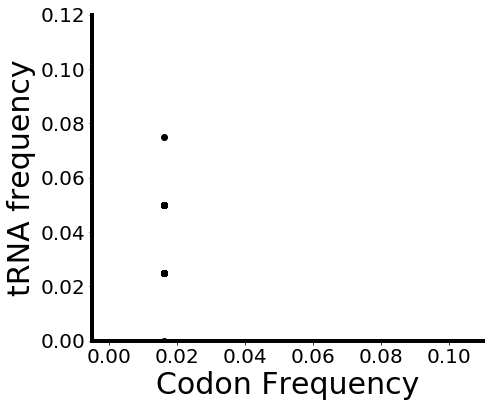

In [47]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

In [7]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np

i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("/Users/akshay/Documents/TranslationDynamics/data/All_genes_of_E._coli_K-12_substr._MG1655-2.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    counter = Counter(sequence)
    
    pCodon = dict(zip(codon_tags,[0]*len(codon_tags)))
    for key in counter:
        pCodon[key] = counter[key]
    pCodon = np.array(list(pCodon.values()))
    gene_map[seq_record.id] = pCodon/sum(pCodon)
print(len(gene_map))

gene_type = pd.read_csv('/Users/akshay/Documents/TranslationDynamics/data/Gene_Name_from_All_genes_of_E._coli_K-12_substr._MG1655-2.txt',sep='\t')
gene_type_map = dict(zip(gene_type.AllGenes,gene_type.Geneproducts))

del_count = 0
for i,key in enumerate(gene_type_map.keys()):
    try:
        if('RNA' in gene_type_map[key]):
           del gene_map[key]
           del_count +=1
    except:
        nothing = 0

print("Removed ", del_count, " RNA species")
print(len(gene_map))

4707
Removed  349  RNA species
4358


In [13]:
%%time 
from joblib import Parallel, delayed
import multiprocessing  
def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff])

inputs=[[gr25_ptRNA,gene_map[key],gr_dict] for i,key in enumerate(gene_map)]
elong_t_genes = Parallel(n_jobs=16,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
elong_t_genes = [elong_t[0] for elong_t in elong_t_genes]
print(elong_t_genes)

[204.98127437853861, 190.34090771752392, 196.67197741087196, 195.5594980800392, 201.00421752991807, 199.09070435188096, 196.04571609092574, 201.2843562576526, 199.0840611805235, 201.88969838345537, 204.85365787799117, 196.65540976609154, 203.59216041000698, 203.6060458207471, 198.47536786124186, 195.25577640065407, 199.23596074432498, 199.00362858579854, 195.50774353513958, 198.63587622287102, 195.81205513900355, 199.5872964084747, 205.58585702047182, 198.1508865935546, 199.30857941701765, 195.44842633858096, 195.75383097043186, 194.96562378786817, 200.20057190486335, 206.22244442187315, 198.6853270483538, 200.43731817619255, 195.95463350598888, 202.5630162162354, 199.59963195675766, 206.3530852144302, 201.55006750217925, 193.34120507391137, 199.56787365950348, 201.6570417225868, 204.23878395818355, 196.2480606289281, 194.39156022655618, 196.67013859896244, 201.67786268323994, 198.09555917808032, 199.72272469060488, 199.86788595399295, 203.4801207064384, 198.81699001946026, 199.6790979

Text(0, 0.5, 'Probability Density')

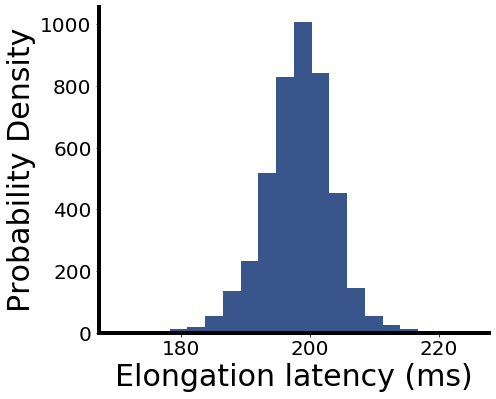

In [29]:
fig,ax = plt.subplots(figsize=(7,6))

hist=ax.hist(elong_t_genes,color='#39568CFF',range=(170,225),bins=20)



ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=30)
ax.set_ylabel('Probability Density',size=30)

In [30]:
%%time 
from joblib import Parallel, delayed
import multiprocessing  
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))


def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff])

inputs=[[ptRNA_uniform,gene_map[key],gr_dict] for i,key in enumerate(gene_map)]
elong_t_genes_uniform = Parallel(n_jobs=16,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
elong_t_genes_uniform = [elong_t[0] for elong_t in elong_t_genes]
print(elong_t_genes_uniform)

KeyboardInterrupt: 

In [31]:
fig,ax = plt.subplots(figsize=(7,6))

hist=ax.hist(elong_t_genes_uniform,color='#39568CFF',range=(170,225),bins=20)



ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=30)
ax.set_ylabel('Probability Density',size=30)

NameError: name 'elong_t_genes_uniform' is not defined

Error in callback <function flush_figures at 0x7f9b6806c3b0> (for post_execute):


KeyboardInterrupt: 

array([0.05, 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.05, 0.  , 0.  , 0.05,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.05,
       0.  , 0.05, 0.1 , 0.  , 0.05, 0.05, 0.  , 0.  , 0.  , 0.  , 0.05,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.05])

In [62]:
computedElongationLatency_gr3_v2(gr25_ptRNA,gene_map['ypfM'],gr_dict)

([179.84663150017403], [10.930827178594024])

In [39]:
pCodon_zeros= np.zeros(len(gr25_pCodon))
codon_elongation_latency = list()
for i in range(len(pCodon_zeros)):
    print(i)
    pCodon_zeros= np.zeros(len(gr25_pCodon))
    pCodon_zeros[i] = 1
    codon_elongation_latency.append(computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_zeros,gr_dict)[0][0])
codon_elongations = dict(zip(codon_labels, codon_elongation_latency))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [38]:
codon_elongations

{'GGG': ([205.6821832961457], [13.398961880426866]),
 'GGA': ([214.14735708669247], [14.936412117043593]),
 'GGU': ([144.3353611647397], [5.851421786348012]),
 'GGC': ([129.75987391794712], [4.52191430054389]),
 'GAG': ([119.79822663255487], [3.6809525341786524]),
 'GAA': ([126.96961901021486], [4.191699024856518]),
 'GAU': ([187.43033768647365], [10.822180265474769]),
 'GAC': ([186.90270322121424], [10.674307632677895]),
 'GUG': ([157.42400752890086], [7.1285142641429164]),
 'GUA': ([156.7971631695184], [7.081877893740938]),
 'GUU': ([168.61814342517647], [9.570375457775269]),
 'GUC': ([231.97560355545517], [17.859993092985697]),
 'GCG': ([155.08663651094497], [6.7801397162500745]),
 'GCA': ([164.82158244691342], [7.989267184233923]),
 'GCU': ([156.43004768361976], [6.9594364932090915]),
 'GCC': ([245.47246360011033], [20.41755521891464]),
 'AGG': ([250.03036335725264], [21.366676706644345]),
 'AGA': ([238.63377564022693], [19.099761130646453]),
 'AGU': ([234.3589276895323], [18.48728